In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
df = pd.read_csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv")

In [2]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
df.info()
#df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
from sklearn.preprocessing import LabelEncoder
# 결축치 확인, 스케일링
# fit = 인코더 실행, transform 형식까지 맞춰서
# labelEncoding = 정수 숫자로 바꾸어준다.
df["species"] = LabelEncoder().fit_transform(df["species"])
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [50]:
cluster1 = KMeans(n_clusters=3, max_iter=100)
#k의 숫자와, 중심을 찾기 위해 이동하는 최대 횟수

# 학습 시작
cluster1.fit(df)

KMeans(max_iter=100, n_clusters=3)

In [51]:
# 결과 확인
cluster1 = cluster1.cluster_centers_
print("중심점: " , cluster1)


중심점:  [[5.006 3.428 1.462 0.246 0.    0.   ]
 [6.624 2.984 5.562 2.026 1.98  2.   ]
 [5.9   2.76  4.25  1.326 1.02  1.   ]]


In [59]:
cluster_prediction = cluster1.predict(df)
df['cluster'] = cluster_prediction


AttributeError: 'numpy.ndarray' object has no attribute 'predict'

In [60]:
df[['species','cluster']]

,species,cluster
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
145,2,2
146,2,2
147,2,2
148,2,2


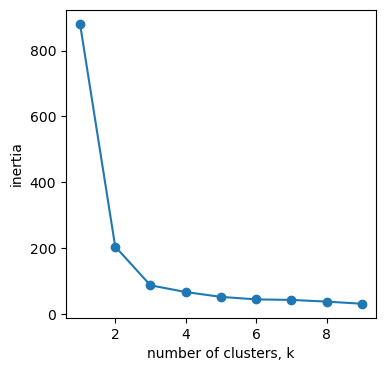

In [78]:
# 적절한 K에 대해 붓꽃 데이터프레임을 넣어 K와 inertia를 비교
# 값(3)이 적합한 변화시점임을 알 수 있음
scope = range(1,10)
inertias = []
for k in scope:
    model = KMeans(n_clusters=k)
    model.fit(df)
    inertias.append(model.inertia_)
# K 개수와 inertia 비교 시각화
# figure 도화지 깔기. 4,4로 깔겠다
plt.figure(figsize=(4, 4))
# 점과 선으로 이루어진 그래프를 그리겠다. 2차원, arg = (x,y,점과 선)
plt.plot(scope, inertias, 'o-')

plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.show()

In [80]:
df2 = pd.read_csv('./housing2.csv')
df2.info()
#전부다 float => labelencoding할 필요가 없다.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [93]:
#init: 개선된 알고리즘으로 더 나은 초기값 설정
cluster2 = KMeans(n_clusters=3, max_iter=200, init='k-means++')


In [94]:
cluster2.fit(df2)

KMeans(max_iter=200, n_clusters=3)

In [90]:
# 결과 확인
cluster2 = cluster2.cluster_centers_
print(cluster2)


[[ 3.76976022e+00  2.37923194e+01  5.11588595e+00  1.06577687e+00
   2.34354050e+03  3.26955868e+00  3.52967730e+01 -1.19294687e+02
   2.00642287e+00]
 [ 3.89652823e+00  3.08127517e+01  5.53773604e+00  1.10830438e+00
   9.43137651e+02  2.85455143e+00  3.57652953e+01 -1.19683919e+02
   2.09244532e+00]
 [ 4.15307075e+00  1.47826087e+01  5.46589053e+00  1.07384122e+00
   6.13240711e+03  7.37675093e+00  3.51687945e+01 -1.19051206e+02
   2.00788164e+00]]


In [95]:
cluster_prediction2 = cluster2.predict(df2)
df2['cluster'] = cluster_prediction2
df2

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal,cluster
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526,1
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585,0
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521,1
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413,1
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422,1
...,...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781,1
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771,1
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923,1
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847,1


In [99]:
#실루엣 계수
from sklearn.metrics import silhouette_samples
name_list = df2.columns
name_list = name_list.tolist()
name_list.remove('cluster')
name_list

df2['silhouette'] = silhouette_samples(X=df2[['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude',
 'MedHouseVal']], labels=df2['cluster'])
# 실루엣 계수가 1에 가까울수록 분류가 잘 된거다.
df2

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal,cluster,silhouette
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526,1,0.683778
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585,0,0.644403
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521,1,0.730191
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413,1,0.745194
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422,1,0.746797
...,...,...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781,1,0.783270
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771,1,0.693105
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923,1,0.761958
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847,1,0.777830
